In [1]:
# 0304 3조 팀과제 !!

------------------------------------------------------
- 연습문제 스터디 조원별로 나눠풀기

In [2]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm

Text(0.2, 0.4, '한글')

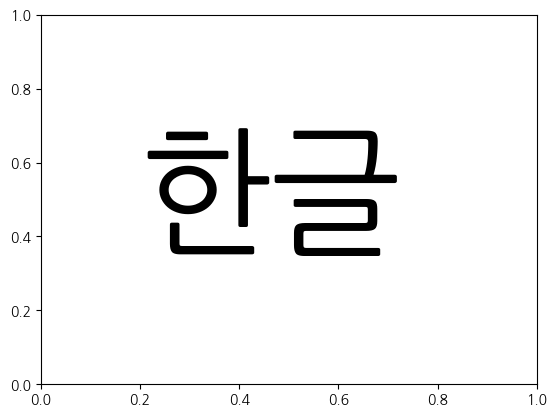

In [3]:
# 윈도우용 폰트 경로 설정
path = "C:\\Windows\\Fonts\\NanumGothic.ttf"
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)
plt.text(0.2,0.4,'한글',size=100)

In [22]:
import pandas as pd
file_path = "./data ref/IRIS.csv"
iris_data = pd.read_csv(file_path)
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
iris_data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_c = iris_data.groupby(['class']).sum()
print(iris_c.index)

Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object', name='class')


In [26]:
print(len(iris_c.index))

3


In [27]:
print(iris_c)

                 sepal_length  sepal_width  petal_length  petal_width
class                                                                
Iris-setosa             250.3        170.9          73.2         12.2
Iris-versicolor         296.8        138.5         213.0         66.3
Iris-virginica          329.4        148.7         277.6        101.3


In [29]:
iris_c.loc['Iris-setosa']

sepal_length    250.3
sepal_width     170.9
petal_length     73.2
petal_width      12.2
Name: Iris-setosa, dtype: float64

___________________________
- 연령별취업자수관계 데이터를 이용해서 팀별상의하여 의미있는 인사이트 도출하기(1가지만)

In [ ]:
import pandas as pd
file_path = "./data ref/행정구역_시도__성_연령별_취업자.csv"
ori = pd.read_csv(file_path,encoding="EUC-KR")
ori.head()

In [ ]:
# 세종시의 인구를 미리 처리해두자 ~ : 인구수가 집계되지 않음

In [ ]:
ex_data = ori.copy()
ex_data.columns = ['region','year','age','gender','value'] # 컬럼 이름 일괄 교체 !!
ex_data.loc[ex_data['region']=='세종특별자치시','value']=ex_data.loc[ex_data['region']=='세종특별자치시','value'].replace('-',0)
# ex_data.loc[ex_data['region']=='세종특별자치시','value']

In [ ]:
busan_data = ex_data.loc[ex_data['region']=='부산광역시']
busan_data

In [ ]:
busan_data['value'] = busan_data['value'].astype(int)
busan_gen = busan_data.groupby(['region','year','gender'])['value'].sum().reset_index(name='total')
busan_gen

In [ ]:
filter_m = gen['gender']=='남자'
filter_f= gen['gender'] =='여자'
male = gen[filter_m]
female = gen[filter_f]

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(male['year'],male['total'],label='남자',color="blue",linestyle='-', marker='o')
plt.plot(male['year'],female['total'],label='남자',color="red",linestyle='-', marker='x')
plt.xticks(range(len(busan_data)))
plt.xticks(busan_data['year'],rotation=45)
plt.show()